In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import curve_fit

In [2]:
def T_c(M, m1='0', m2='0'):
    """
    Calculate the central temperature of the star for a given mass M (in M_sun).
    
    Args:
        M (float or numpy array): Mass of the star in M_sun.
        m1 (str): Choice of model, 1.83+/-0.06 (possible values are '0', '+' or '-')
        m2 (str): Choice of model, 0.22+/-0.01 (possible values are '0', '+' or '-')
    Returns:
        float or numpy array: Central temperature in the given model in keV.
    """
    Tc_m1 = [1.83, 1.83-0.06, 1.83+0.06] #first parameter, central temperature   #
    Tc_m2 = [0.22, 0.22-0.01, 0.22+0.01] #second parameter, exponent of M/M_odot
    
    if m1 == '0':
        Tc_m1_res = Tc_m1[0]
    elif m1 == '-':
        Tc_m1_res = Tc_m1[1] 
    elif m1 == '+':
        Tc_m1_res = Tc_m1[2]
    else:
        raise ValueError("Invalid parameter m1 specified. Choose '0', '+' or '-'.")

    if m2 == '0':
        Tc_m2_res = Tc_m2[0]
    elif m2 == '-':
        Tc_m2_res = Tc_m2[1] 
    elif m2 == '+':
        Tc_m2_res = Tc_m2[2]
    else:
        raise ValueError("Invalid parameter m2 specified. Choose '0', '+' or '-'.")
    
    return Tc_m1_res * (M**Tc_m2_res)


def r_T(M, m1='0', m2='0'):
    """
    Calculate the length scale of the central temperature of the star for a given mass M (in M_sun).
    
    Args:
        M (float or numpy array): Mass of the star in M_sun.
        m1 (str): Choice of model, 0.86+/-0.03 (possible values are '0', '+' or '-')
        m2 (str): Choice of model, 0.61+/-0.01 (possible values are '0', '+' or '-')
    Returns:
        float or numpy array: Central temperature in the given model in keV.
    """
    rT_m1 = [0.86, 0.86-0.03, 0.86+0.03] #first parameter, central value
    rT_m2 = [0.61, 0.61-0.01, 0.61+0.01] #second parameter, exponent of M/M_odot
    
    if m1 == '0':
        rT_m1_res = rT_m1[0]
    elif m1 == '-':
        rT_m1_res = rT_m1[1] 
    elif m1 == '+':
        rT_m1_res = rT_m1[2]
    else:
        raise ValueError("Invalid parameter m1 specified. Choose '0', '+' or '-'.")

    if m2 == '0':
        rT_m2_res = rT_m2[0]
    elif m2 == '-':
        rT_m2_res = rT_m2[1] 
    elif m2 == '+':
        rT_m2_res = rT_m2[2]
    else:
        raise ValueError("Invalid parameter m2 specified. Choose '0', '+' or '-'.")
    
    return rT_m1_res * (M**rT_m2_res)

def T(r, M, m1='0', m2='0', m3='0', m4='0'):
    """
    Calculate the temperature profile of the star at radius r (in R_sun) and for a given mass M (in M_sun).
    
    Args:
        r (float or numpy array): Radius.
        M (float): Mass of the star.
        m1/4 (str):  Choose '0', '+' or '-'.
    Returns:
        float or numpy array: Temperature in the given model in keV.
    """    
    return T_c(M, m1, m2) * np.exp(-r/r_T(M, m3, m4))

def k_c(M, m1='0', m2='0'):
    """
    Calculate the central screening scale of the star for a given mass M (in M_sun).
    
    Args:
        M (float or numpy array): Mass of the star in M_sun.
        m1 (str): Choice of model (possible values are '0', '+' or '-')
        m2 (str): Choice of model (possible values are '0', '+' or '-')
    Returns:
        float or numpy array: Central temperature in the given model in keV.
    """
    kc_m1 = [10.4, 10.4-0.1, 10.4+0.1] #first parameter, central screening
    kc_m2 = [-0.76, -0.76-0.02, -0.76+0.02] #second parameter, exponent of M/M_odot
    
    if m1 == '0':
        kc_m1_res = kc_m1[0]
    elif m1 == '-':
        kc_m1_res = kc_m1[1] 
    elif m1 == '+':
        kc_m1_res = kc_m1[2]
    else:
        raise ValueError("Invalid parameter m1 specified. Choose '0', '+' or '-'.")

    if m2 == '0':
        kc_m2_res = kc_m2[0]
    elif m2 == '-':
        kc_m2_res = kc_m2[1] 
    elif m2 == '+':
        kc_m2_res = kc_m2[2]
    else:
        raise ValueError("Invalid parameter m2 specified. Choose '0', '+' or '-'.")
    
    return kc_m1_res * (M**kc_m2_res)

def r_k(M, m1='0', m2='0'):
    """
    Calculate the length scale of the central screening of the star for a given mass M (in M_sun).
    
    Args:
        M (float or numpy array): Mass of the star in M_sun.
        m1 (str): Choice of model (possible values are '0', '+' or '-')
        m2 (str): Choice of model (possible values are '0', '+' or '-')
    Returns:
        float or numpy array: Screening in the given model in keV.
    """
    rk_m1 = [1.06, 1.06-0.05, 1.06+0.05] #first parameter, central value
    rk_m2 = [0.56, 0.56-0.01, 0.56+0.01] #second parameter, exponent of M/M_odot
    
    if m1 == '0':
        rk_m1_res = rk_m1[0]
    elif m1 == '-':
        rk_m1_res = rk_m1[1] 
    elif m1 == '+':
        rk_m1_res = rk_m1[2]
    else:
        raise ValueError("Invalid parameter m1 specified. Choose '0', '+' or '-'.")

    if m2 == '0':
        rk_m2_res = rk_m2[0]
    elif m2 == '-':
        rk_m2_res = rk_m2[1] 
    elif m2 == '+':
        rk_m2_res = rk_m2[2]
    else:
        raise ValueError("Invalid parameter m2 specified. Choose '0', '+' or '-'.")
    
    return rk_m1_res * (M**rk_m2_res)

def kappa(r, M, m1='0', m2='0', m3='0', m4='0'):
    """
    Calculate the screening profile of the star at radius r (in R_sun) and for a given mass M (in M_sun).
    
    Args:
        r (float or numpy array): Radius.
        M (float): Mass of the star.
        m1/4 (str):  Choose '0', '+' or '-'.
    Returns:
        float or numpy array: Temperature in the given model in keV.
    """    
    return k_c(M, m1, m2) * np.exp(-r/r_k(M, m3, m4))

def omega_p_c(M, m1='0', m2='0'):
    """
    Calculate the central plasma frequency of the star for a given mass M (in M_sun).
    
    Args:
        M (float or numpy array): Mass of the star in M_sun.
        m1 (str): Choice of model (possible values are '0', '+' or '-')
        m2 (str): Choice of model (possible values are '0', '+' or '-')
    Returns:
        float or numpy array: Central temperature in the given model in keV.
    """
    omegapc_m1 = [0.350, 0.350-0.004, 0.350+0.004] #first parameter, central plasma frequency
    omegapc_m2 = [-0.60, -0.60-0.01, -0.60+0.01] #second parameter, exponent of M/M_odot
    
    if m1 == '0':
        omegapc_m1_res = omegapc_m1[0]
    elif m1 == '-':
        omegapc_m1_res = omegapc_m1[1] 
    elif m1 == '+':
        omegapc_m1_res = omegapc_m1[2]
    else:
        raise ValueError("Invalid parameter m1 specified. Choose '0', '+' or '-'.")

    if m2 == '0':
        omegapc_m2_res = omegapc_m2[0]
    elif m2 == '-':
        omegapc_m2_res = omegapc_m2[1] 
    elif m2 == '+':
        omegapc_m2_res = omegapc_m2[2]
    else:
        raise ValueError("Invalid parameter m2 specified. Choose '0', '+' or '-'.")
    
    return omegapc_m1_res * (M**omegapc_m2_res)


def r_omega_p(M, m1='0', m2='0'):
    """
    Calculate the length scale of the central plasma frequency of the star for a given mass M (in M_sun).
    
    Args:
        M (float or numpy array): Mass of the star in M_sun.
        m1 (str): Choice of model (possible values are '0', '+' or '-')
        m2 (str): Choice of model (possible values are '0', '+' or '-')
    Returns:
        float or numpy array: Screening in the given model in keV.
    """
    romegap_m1 = [0.79, 0.79-0.04, 0.79+0.04] #first parameter, central value
    romegap_m2 = [0.57, 0.57-0.01, 0.57+0.01] #second parameter, exponent of M/M_odot
    
    if m1 == '0':
        romegap_m1_res = romegap_m1[0]
    elif m1 == '-':
        romegap_m1_res = romegap_m1[1] 
    elif m1 == '+':
        romegap_m1_res = romegap_m1[2]
    else:
        raise ValueError("Invalid parameter m1 specified. Choose '0', '+' or '-'.")

    if m2 == '0':
        romegap_m2_res = romegap_m2[0]
    elif m2 == '-':
        romegap_m2_res = romegap_m2[1] 
    elif m2 == '+':
        romegap_m2_res = romegap_m2[2]
    else:
        raise ValueError("Invalid parameter m2 specified. Choose '0', '+' or '-'.")
    
    return romegap_m1_res * (M**romegap_m2_res)

def omega_p(r, M, m1='0', m2='0', m3='0', m4='0'):
    """
    Calculate the plasma frequency profile of the star at radius r (in R_sun) and for a given mass M (in M_sun).
    
    Args:
        r (float or numpy array): Radius.
        M (float): Mass of the star.
        m1/4 (str):  Choose '0', '+' or '-'.
    Returns:
        float or numpy array: Temperature in the given model in keV.
    """    
    return omega_p_c(M, m1, m2) * np.exp(-r/r_omega_p(M, m3, m4))

def dndEdt(r, M, omega, ma, options = [['0', '0', '0', '0'], #T
                                        ['0', '0', '0', '0'], #kappa
                                        ['0', '0', '0', '0']]): #omega_p
    """
    Integrand for computing the axion spectrum.
    
    Args:
        M (float): Stellar mass in M_sun.
        r (float): Radius in R_sun.
        omega (float): Axion/photon energy in keV.
        ma (float): Axion mass in keV.
        options (string): 3X4 matrix with the '0', '+' or '-' options for each parameter of the model. In order T, kappa, omega_p
        
    Returns:
        float: Value of the integrand at radius r.
    """
    if len(options) != 3:
        raise ValueError("Invalid option specified. It has to be a 3X4 matrix with '0', '+' or '-'.")
    for row in options:
        if len(row) != 4:
            raise ValueError("Invalid option specified. It has to be a 3X4 matrix with '0', '+' or '-'.")


    [mT1, mT2, mT3, mT4] = options[0]
    [mk1, mk2, mk3, mk4] = options[1]
    [momg1, momg2, momg3, momg4] = options[2]
    #calculate the values to use 
    Tv = T(r, M, m1 = mT1, m2 = mT2, m3 = mT3, m4 = mT4)
    kappav = kappa(r, M, m1 = mk1, m2 = mk2, m3 = mk3, m4 = mk4)
    omega_pv = omega_p(r, M, m1 = momg1, m2 = momg2, m3 = momg3, m4 = momg4)
    
    if omega<omega_pv or omega<ma:
        return 0
    
    k = np.sqrt((omega**2) - (omega_pv**2))
    p = np.sqrt((omega**2) - (ma*2))
    fomg = 1/(np.exp(omega/Tv)-1)
    
    P1 = ((k+p)**2 + kappav**2)*((k-p)**2 + kappav**2)/(4*p*k*(kappav**2))
    L1 = np.log(((k+p)**2 + kappav**2)/((k-p)**2 + kappav**2))
    P2 = ((k**2 - p**2)**2)/(4*p*k*(kappav**2))
    L2 = np.log(((k+p)**2)/((k-p)**2))

    res = k/(np.pi**2)
    res = res * omega*fomg*p/omega
    res = res * Tv*(kappav**2)/(32*np.pi)
    res = res * (P1*L1 - P2*L2 -1)
    return res * 4*np.pi*r**2


########################################################################################################

def dNdEdt(gag, M, omega, ma, options = [['0', '0', '0', '0'], #T
                                        ['0', '0', '0', '0'], #kappa
                                        ['0', '0', '0', '0']]): #omega_p
    """
    Integrand for computing the axion spectrum.
    
    Args:
        gag (float): Axion-photon coupling in GeV^-1.
        M (float): Stellar mass in M_sun.
        omega (float): Axion/photon energy in keV.
        ma (float): Axion mass in keV.
        options (string): 3X4 matrix with the '0', '+' or '-' options for each parameter of the model. In order T, kappa, omega_p
        
    Returns:
        float: Value of the spectrum.
    """
   
    r_max = 3*r_T(M)    
    result, _ = quad(dndEdt, 0, r_max, args=(M, omega, ma, options))
    result = result * (gag**2) * 6.68414*1.e+61
    return result #in keV^-1 s^-1

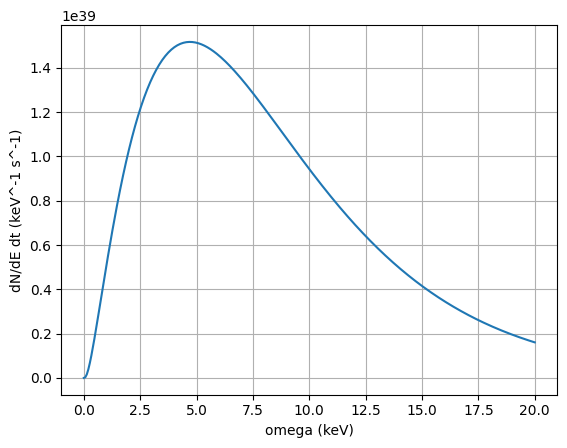

/tmp/ipykernel_816/1725437867.py:31: RuntimeWarning: divide by zero encountered in power
  return params[0] * ((omega/params[1])**params[2]) * np.exp(-(1+params[2]) * (omega/params[1]))
/tmp/ipykernel_816/1725437867.py:31: RuntimeWarning: invalid value encountered in power
  return params[0] * ((omega/params[1])**params[2]) * np.exp(-(1+params[2]) * (omega/params[1]))


Optimized parameters: [1.21173389e+40 8.41127622e+00 1.33545874e+00]


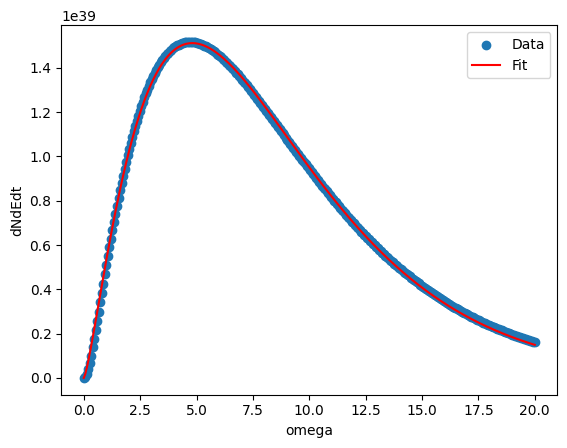

In [74]:
options_low = [['-', '-', '-', '-'], #T
              ['+', '+', '+', '+'], #kappa
              ['+', '+', '+', '+']] #omega_pb

options_high = [['+', '+', '+', '+'], #T
               ['-', '-', '-', '-'], #kappa
               ['-', '-', '-', '-']] #omega_pb

options = options_low
gag = 1.e-12 #GeV^-1
M = 90 #M_sun
ma = 0 #keV
omega_max = 20
num_points = 300
omega_values = np.linspace(ma, omega_max, num_points) #keV

# Calculate dNdEdt for each omega value
dNdEdt_values = np.array([dNdEdt(gag, M, omg, ma, options = options) for omg in omega_values])

# Plot the function
plt.plot(omega_values, dNdEdt_values)
plt.xlabel('omega (keV)')
plt.ylabel('dN/dE dt (keV^-1 s^-1)')
plt.grid(True)
plt.show()

# Define your functional form
def your_function(omega, *params):
    # Your functional form here
    # Example:
    return params[0] * ((omega/params[1])**params[2]) * np.exp(-(1+params[2]) * (omega/params[1]))

# Perform the fit
params_guess = [1.e+39, 10, 2]  # Initial guess for parameters
params_opt, params_cov = curve_fit(your_function, omega_values, dNdEdt_values, p0=params_guess)

# params_opt contains optimized parameters
# params_cov contains covariance matrix

# Print the optimized parameters
print("Optimized parameters:", params_opt)

plt.scatter(omega_values, dNdEdt_values, label='Data')
plt.plot(omega_values, your_function(omega_values, *params_opt), color='red', label='Fit')
plt.xlabel('omega')
plt.ylabel('dNdEdt')
plt.legend()
plt.show()

/tmp/ipykernel_816/3702600695.py:31: RuntimeWarning: divide by zero encountered in power
  return params[0] * ((omega/params[1])**params[2]) * np.exp(-(1+params[2]) * (omega/params[1]))
/tmp/ipykernel_816/3702600695.py:31: RuntimeWarning: invalid value encountered in power
  return params[0] * ((omega/params[1])**params[2]) * np.exp(-(1+params[2]) * (omega/params[1]))
/tmp/ipykernel_816/3702600695.py:31: RuntimeWarning: overflow encountered in multiply
  return params[0] * ((omega/params[1])**params[2]) * np.exp(-(1+params[2]) * (omega/params[1]))
/tmp/ipykernel_816/3702600695.py:31: RuntimeWarning: overflow encountered in power
  return params[0] * ((omega/params[1])**params[2]) * np.exp(-(1+params[2]) * (omega/params[1]))


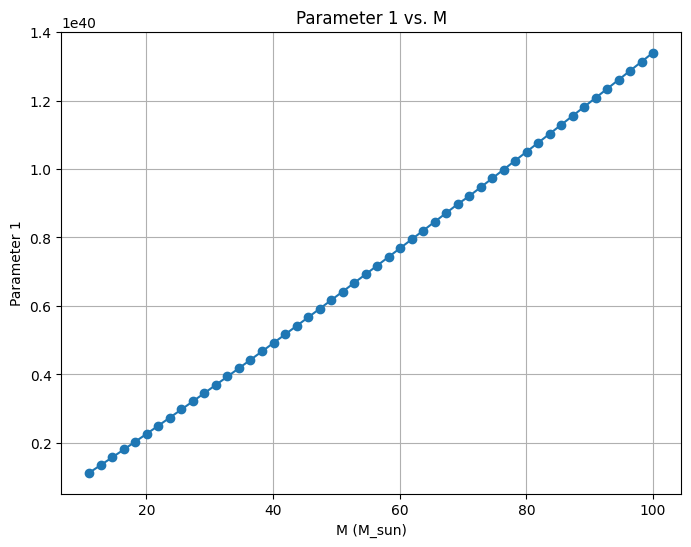

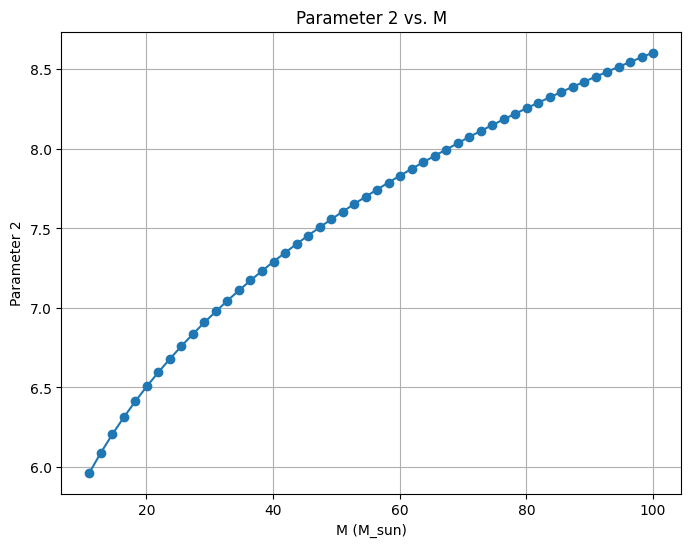

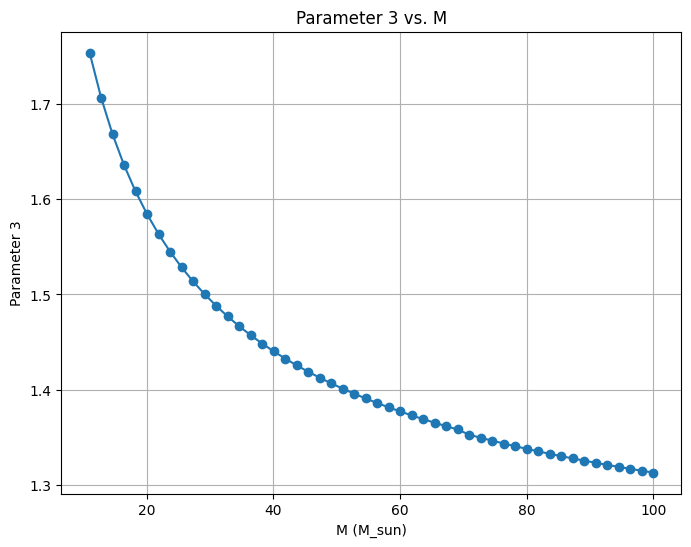

In [69]:
# Given parameters
gag = 1.e-12 #GeV^-1
ma = 0 #keV
num_points = 100


# List of different values of M
M_values = np.linspace(11,100,50)  # Example values

# Store optimized parameters for different M values
optimized_parameters = []

# Loop over different values of M
for M in M_values:
    if M<=10:
        pg1=1.e+37
        pg2=5
        pg3=2
        omega_max=20
    elif M>10 and M<=70:  
        pg1=1.e+38
        pg2=7
        pg3=2
        omega_max=40
    elif M>70:  
        pg1=1.e+39
        pg2=10
        pg3=2
        omega_max=70
    omega_values = np.linspace(ma, omega_max, num_points) #keV
    
    options_low = [['-', '-', '-', '-'], #T
                  ['+', '+', '+', '+'], #kappa
                  ['+', '+', '+', '+']] #omega_pb

    options_high = [['+', '+', '+', '+'], #T
                   ['-', '-', '-', '-'], #kappa
                   ['-', '-', '-', '-']] #omega_pb

    options = options_low
    
    # Calculate dNdEdt for each omega value
    dNdEdt_values = np.array([dNdEdt(gag, M, omg, ma, options=options) for omg in omega_values])
    
    # Perform the fit
    params_guess = [pg1,pg2,pg3]  # Initial guess for parameters
    params_opt, params_cov = curve_fit(your_function, omega_values, dNdEdt_values, p0=params_guess)
    
    # Store the optimized parameters
    optimized_parameters.append(params_opt)

# Convert the optimized parameters list to array for easier manipulation
optimized_parameters = np.array(optimized_parameters)

# Plot each optimized parameter as a function of M in separate figures
for i in range(len(params_guess)):
    plt.figure(figsize=(8, 6))
    plt.plot(M_values, optimized_parameters[:, i], marker='o', linestyle='-')
    plt.xlabel('M (M_sun)')
    plt.ylabel(f'Parameter {i+1}')
    plt.title(f'Parameter {i+1} vs. M')
    plt.grid(True)
    plt.show()

Optimized parameters: [-0.01325244  0.00948403  1.07716004]


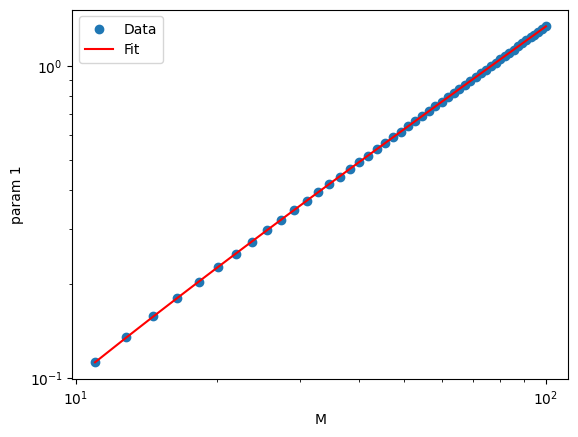

In [70]:
# Define your functional form

def your_f(M, *params):
    # Your functional form here
    # Example:
    return params[0] + params[1]*M**params[2]  

# def your_f(M, *params):
#     # Your functional form here
#     # Example:
#     return params[0] + (M**params[2])*params[1]

# def your_f(M, *params):
#     # Your functional form here
#     # Example:
#     return params[0]+params[1]*np.exp(-M**params[2])

optp = optimized_parameters[:,0]/1.e+40

# Perform the fit
params_guess = [1,1,1]  # Initial guess for parameters
params_opt, params_cov = curve_fit(your_f, M_values, optp, p0=params_guess)

# params_opt contains optimized parameters
# params_cov contains covariance matrix

# Print the optimized parameters
print("Optimized parameters:", params_opt)

plt.scatter(M_values, optp, label='Data')
plt.plot(M_values, your_f(M_values, *params_opt), color='red', label='Fit')
plt.xlabel('M')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('param 1')
plt.legend()
plt.show()

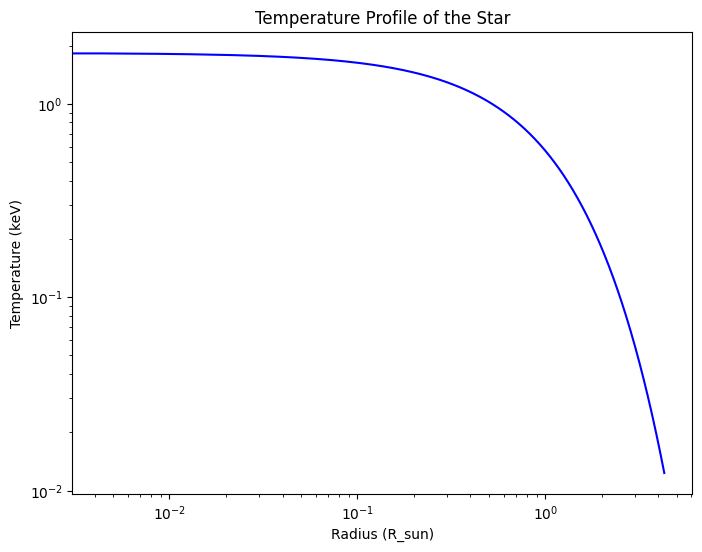

In [21]:
M = 1
# Define radii to plot temperature profile
radii = np.linspace(0, 5*r_T(M), 1000)
# Plot temperature profile
plt.figure(figsize=(8, 6))
plt.xscale('log')
plt.yscale('log')
plt.plot(radii, T(radii, M,  m1='0', m2='0'), color='blue')
plt.xlabel('Radius (R_sun)')
plt.ylabel('Temperature (keV)')
plt.title('Temperature Profile of the Star')
plt.grid(False)
plt.show()

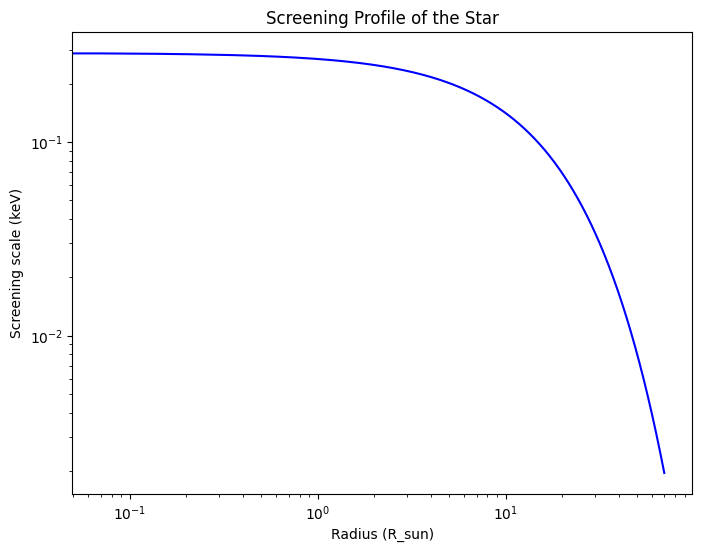

In [23]:
M = 1
# Define radii to plot profile
radii = np.linspace(0, 5*r_k(M), 1000)
# Plot temperature profile
plt.figure(figsize=(8, 6))
plt.xscale('log')
plt.yscale('log')
plt.plot(radii, kappa(radii, M,  m1='+', m2='-'), color='blue')
plt.xlabel('Radius (R_sun)')
plt.ylabel('Screening scale (keV)')
plt.title('Screening Profile of the Star')
plt.grid(False)
plt.show()

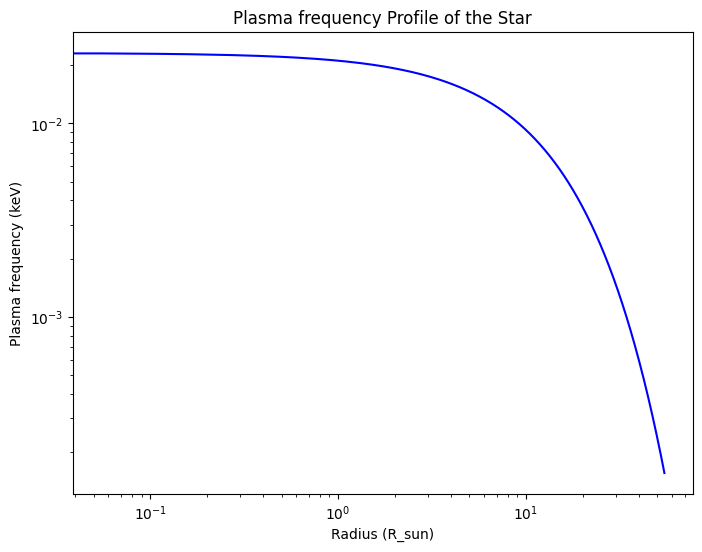

In [27]:
M = 1
# Define radii to plot profile
radii = np.linspace(0, 5*r_omega_p(M), 1000)
# Plot temperature profile
plt.figure(figsize=(8, 6))
plt.xscale('log')
plt.yscale('log')
plt.plot(radii, omega_p(radii, M,  m1='0', m2='+'), color='blue')
plt.xlabel('Radius (R_sun)')
plt.ylabel('Plasma frequency (keV)')
plt.title('Plasma frequency Profile of the Star')
plt.grid(False)
plt.show()